# Simple Linear Regression

## In this regression analysis, the goal is to predict the percentage of marks a student will achieve by examining the number of hours they dedicate to studying. The task is a straightforward linear regression, focusing on two variables: the number of hours studied given in the dataset as "Hours" and the corresponding percentage of marks obtained as "Scores"

In [51]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# Loading the dataset 
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [53]:
# Data types present in the data set
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [54]:
# Checking for null values present in the dataset
pd.isnull(df).sum()

Hours     0
Scores    0
dtype: int64

### Let's draw our data on a 2D graph to see if there's a clear connection between study hours and marks. This plot will help us visually understand the relationship.


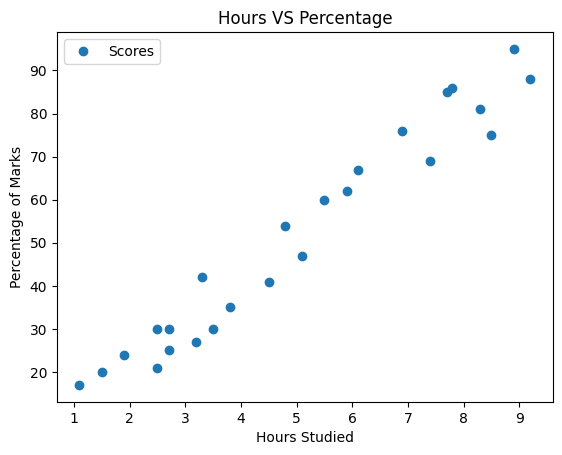

In [55]:
# Plotting the distribution of scores
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours VS Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of Marks')
plt.show()

### From the graph above we can clarly see that there is a positive linear relation between the Hours Studied and Percentage of Marks

In [56]:
# Dividing the data into "attributes" (inputs) and "labels"(outputs)
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [57]:
# Dividing the data into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [58]:
# Training the algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


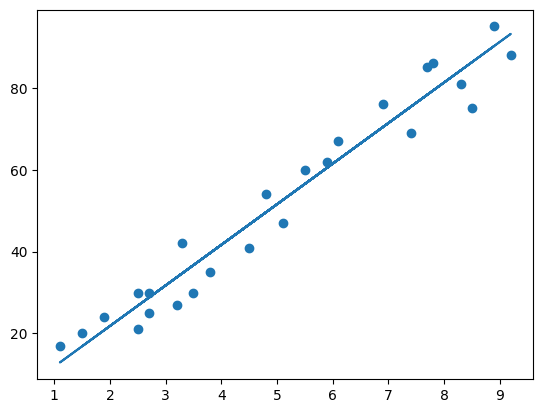

In [59]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show() 

In [60]:
# Making Predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [61]:
# Comparing Actual vs Predicted
s_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
s_df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [63]:
# We can also test with your own data 
hours = 9.25
own_pred = regressor.predict(np.array(hours).reshape(1, -1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [64]:
# Evaluate the Model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
